Quick tips --

* Shift-ENTER to execute cell and move to next
* Edit etc. cells whenever you want using mouse etc
* Use menu (Cell... Run All...) to rerun the whole thing

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /mnt

/mnt


In [3]:
# check out simulation code for making genomes and reads
!git clone https://github.com/dib-lab/nullgraph.git kmers

Cloning into 'kmers'...
remote: Counting objects: 118, done.
remote: Total 118 (delta 0), reused 0 (delta 0), pack-reused 118
Receiving objects: 100% (118/118), 99.14 KiB | 0 bytes/s, done.
Resolving deltas: 100% (63/63), done.
Checking connectivity... done.


In [4]:
cd kmers

/mnt/kmers


In [5]:
ls

dens.ipynb              make-random-genome-with-repeats.py  make-repeats.py*
fasta.py                make-random-transcriptome.py        mix-into-genome.py*
make-biased-reads.py*   make-reads-biased-nonrandom.py      README.rst
Makefile                make-reads-biased-random.py
make-random-genome.py*  make-reads.py*


In [6]:
# build a random genome (1kb) with equal mixes of A/C/G/T
!python make-random-genome.py -l 10000 > genome.fa

Using random seed: 1


In [7]:
# make reads at 100x coverage, 0 error.
!python make-reads.py --coverage 100 --read-length 100 --error-rate 0 genome.fa > reads-e000.fa
!head reads-e000.fa

genome size: 10000
coverage: 100.0
readlen: 100
error rate: 0.0
Read in template genome genome of length 10000 from genome.fa
Generating 10000 reads of length 100 for a target coverage of 100.0 with a target error rate of 0.0
0 of 10000 reads mutated; 0 total mutations
>read0r start=2201,mutations=0
GACGTTCGTACAAGTCAGCACCAATGTGTTCTTTGAGTGTCAGGCATGCCGCCAGTGGTGGCGTAACCGAAGTGGGCGGCAGGACGAAAATGGTCCCTCT
>read1r start=4179,mutations=0
GACGTGGGTCAGACGACGACTGGACACATCTAATGTATAGGTGAGCATGGATAATTGTGAAGATTCGCGAGACTACTGGTTCGCAGCCTCATGACCATCA
>read2f start=8117,mutations=0
CCAGCCCTTCACATTTATAGACTAAGGTAAGGCCATCCCCCTCAGGAATGTACGAGCGCTGAAGTATAAGTGTTCTGCCTTCCTTCATATCTAAAAGAAG
>read3f start=7737,mutations=0
GACAAGCTGTCGTAATGGACTGTCCGCGTTATCTATAGCTGCTAGCTACGGAGTTGAAGCTTAGCGACTTGCCACAGGAAGCTGTTCTTGGGCTACTTTT
>read4r start=3439,mutations=0
TAGGGTACTCAACACCCATGCATTGGAGAGAGTTGTTTAACCGCATCCAGTTTAGGCAGCGGCAGACGTGCGCAAGACCACTGTTAGTTTAATGCTCACG


In [8]:
# count all k-mers in the database and extract a k-mer distribution
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e000.fa reads-k20-e000.dist



|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 2.1.1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     20 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+08 	(-x)
Estimated memory usage is 0.4 Gb (4e+08 bytes = 4 bytes x 1e+08 entries / 1 entries per byte)
--------
making countgraph
building k-mer tracking graph
kmer_size: 20
k-mer countgraph sizes: [99999989, 99999971, 99999959, 99999941]
outputting to reads-k20-e000.dist
consuming input, round 1 -- reads-e000.fa
Total number of unique k-mers: 9980
preparing hist from reads-e000.fa

In [9]:
# in the dist file,
#    column 1 is the k-mer count
#    column 2 is the number of k-mers with that count
#    column 3 is the number of k-mers with less than or equal to that count
#    column 4 is the fraction of total k-mers with less than or equal to that count
!head reads-k20-e000.dist


In [10]:
# read in the numbers
dist = numpy.loadtxt('reads-k20-e000.dist', delimiter=',', skiprows=1)

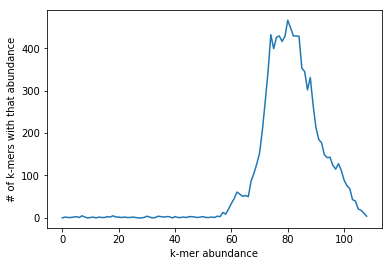

In [11]:
# plot the first two columns
plot(dist[:,0], dist[:,1])
xlabel('k-mer abundance')
ylabel('# of k-mers with that abundance')

In [12]:
# make more reads at different error rate
!python make-reads.py --coverage 100 --read-length 100 --error-rate .001 genome.fa > reads-e001.fa
!python make-reads.py --coverage 100 --read-length 100 --error-rate .01 genome.fa > reads-e010.fa
!python make-reads.py --coverage 100 --read-length 100 --error-rate .1 genome.fa > reads-e100.fa


genome size: 10000
coverage: 100.0
readlen: 100
error rate: 0.001
Read in template genome genome of length 10000 from genome.fa
Generating 10000 reads of length 100 for a target coverage of 100.0 with a target error rate of 0.001
942 of 10000 reads mutated; 990 total mutations
genome size: 10000
coverage: 100.0
readlen: 100
error rate: 0.01
Read in template genome genome of length 10000 from genome.fa
Generating 10000 reads of length 100 for a target coverage of 100.0 with a target error rate of 0.01
6311 of 10000 reads mutated; 9964 total mutations
genome size: 10000
coverage: 100.0
readlen: 100
error rate: 0.1
Read in template genome genome of length 10000 from genome.fa
Generating 10000 reads of length 100 for a target coverage of 100.0 with a target error rate of 0.1
10000 of 10000 reads mutated; 111144 total mutations


In [13]:
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e001.fa reads-k20-e001.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e010.fa reads-k20-e010.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e100.fa reads-k20-e100.dist


|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 2.1.1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     20 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+08 	(-x)
Estimated memory usage is 0.4 Gb (4e+08 bytes = 4 bytes x 1e+08 entries / 1 entries per byte)
--------
making countgraph
building k-mer tracking graph
kmer_size: 20
k-mer countgraph sizes: [99999989, 99999971, 99999959, 99999941]
outputting to reads-k20-e001.dist
consuming input, round 1 -- reads-e001.fa
Total number of unique k-mers: 25882
preparing hist from reads-e001.f

In [14]:
# read in the numbers
dist1 = numpy.loadtxt('reads-k20-e000.dist', delimiter=',', skiprows=1)
dist2 = numpy.loadtxt('reads-k20-e001.dist', delimiter=',', skiprows=1)
dist3 = numpy.loadtxt('reads-k20-e010.dist', delimiter=',', skiprows=1)
dist4 = numpy.loadtxt('reads-k20-e100.dist', delimiter=',', skiprows=1)


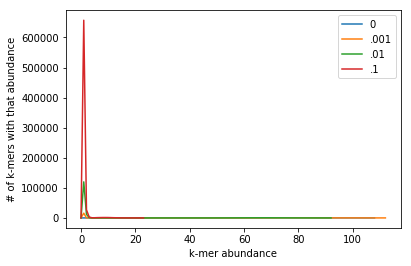

In [15]:
# errors produce a lot of low-abundance k-mers, distorting y axis
plot(dist1[:,0], dist1[:,1], label='0')
plot(dist2[:,0], dist2[:,1], label='.001')
plot(dist3[:,0], dist3[:,1], label='.01')
plot(dist4[:,0], dist4[:,1], label='.1')

xlabel('k-mer abundance')
ylabel('# of k-mers with that abundance')
legend()

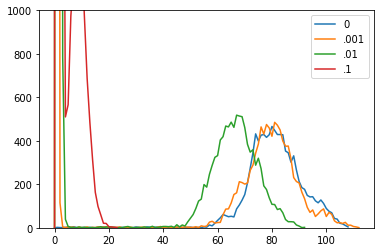

In [16]:
# so zoom in...
plot(dist1[:,0], dist1[:,1], label='0')
plot(dist2[:,0], dist2[:,1], label='.001')
plot(dist3[:,0], dist3[:,1], label='.01')
plot(dist4[:,0], dist4[:,1], label='.1')

axis(ymin=0, ymax=1000)
legend()

In [17]:
# what happens if we trim out all the unique k-mers? => reads.fa.abundfilt
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e000.fa > /dev/null
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e001.fa > /dev/null
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e010.fa > /dev/null
!filter-abund-single.py -C 2 -k 20 -x 1e8 reads-e100.fa > /dev/null


|| This is the script filter-abund-single.py in khmer.
|| You are running khmer version 2.1.1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     20 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+08 	(-x)
Estimated memory usage is 0.4 Gb (4e+08 bytes = 4 bytes x 1e+08 entries / 1 entries per byte)
--------
making countgraph
consuming input, round 1 -- reads-e000.fa
Total number of unique k-mers: 9980
fp rate estimated to be 0.000
filtering reads-e000.fa
output in reads-e000.fa.abundfilt

|| This is the script filter-abund-single.py in khmer.
|| You are running khmer version 2

In [18]:
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e000.fa.abundfilt reads-k20-e000-filt.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e001.fa.abundfilt reads-k20-e001-filt.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e010.fa.abundfilt reads-k20-e010-filt.dist
!abundance-dist-single.py -s -x 1e8 -k 20 reads-e100.fa.abundfilt reads-k20-e100-filt.dist


|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 2.1.1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     20 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+08 	(-x)
Estimated memory usage is 0.4 Gb (4e+08 bytes = 4 bytes x 1e+08 entries / 1 entries per byte)
--------
making countgraph
building k-mer tracking graph
kmer_size: 20
k-mer countgraph sizes: [99999989, 99999971, 99999959, 99999941]
outputting to reads-k20-e000-filt.dist
consuming input, round 1 -- reads-e000.fa.abundfilt
Total number of unique k-mers: 9978
preparing hist fro

In [19]:
# read in the numbers
fdist1 = numpy.loadtxt('reads-k20-e000-filt.dist', delimiter=',', skiprows=1)
fdist2 = numpy.loadtxt('reads-k20-e001-filt.dist', delimiter=',', skiprows=1)
fdist3 = numpy.loadtxt('reads-k20-e010-filt.dist', delimiter=',', skiprows=1)
fdist4 = numpy.loadtxt('reads-k20-e100-filt.dist', delimiter=',', skiprows=1)


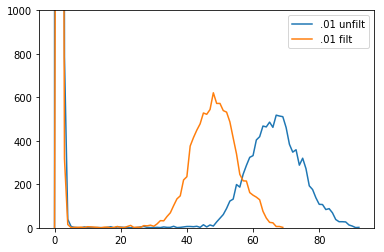

In [20]:
plot(dist3[:,0], dist3[:,1], label='.01 unfilt')
plot(fdist3[:,0], fdist3[:,1], label='.01 filt')
axis(ymin=0, ymax=1000)
legend()

## question:

Why is the green abundance distribution shifted left?? didn't we just eliminate abundance-1 k-mers?

In [21]:
## DIGRESSION - back to presentation to talk about digital normalization

In [22]:
# run digital normalization
!normalize-by-median.py -x 2e8 -N 4 -k 20 -C 20 reads-e010.fa


|| This is the script normalize-by-median.py in khmer.
|| You are running khmer version 2.1.1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * CT Brown et al., arXiv:1203.4802 [q-bio.GN]
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     20 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 2e+08 	(-x)
Estimated memory usage is 0.8 Gb (8e+08 bytes = 4 bytes x 2e+08 entries / 1 entries per byte)
--------
making countgraph
DONE with reads-e010.fa; kept 3872 of 10000 or 38.7%
output in reads-e010.fa.keep
Total number of unique k-mers: 83353
fp rate estimated to be 0.000


In [23]:
# let's look at the abundance distribution post-diginorm
!abundance-dist-single.py -s -k 20 -x 1e8 reads-e010.fa.keep reads-e010-dn.dist


|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 2.1.1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     20 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+08 	(-x)
Estimated memory usage is 0.4 Gb (4e+08 bytes = 4 bytes x 1e+08 entries / 1 entries per byte)
--------
making countgraph
building k-mer tracking graph
kmer_size: 20
k-mer countgraph sizes: [99999989, 99999971, 99999959, 99999941]
outputting to reads-e010-dn.dist
consuming input, round 1 -- reads-e010.fa.keep
Total number of unique k-mers: 83353
preparing hist from reads-e0

In [24]:
dist3_dn = numpy.loadtxt('reads-e010-dn.dist', delimiter=',', skiprows=1)

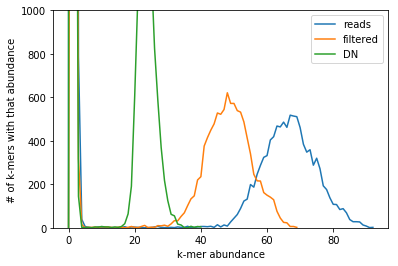

In [25]:
plot(dist3[:,0], dist3[:,1], label='reads')
plot(fdist3[:,0], fdist3[:,1], label='filtered')
plot(dist3_dn[:,0], dist3_dn[:,1], label='DN')

xlabel('k-mer abundance')
ylabel('# of k-mers with that abundance')
axis(ymin=0, ymax=1000)
legend()

### Note, after running digital normalization, you have a LOT less data:

In [26]:
!ls -la *e010*fa*

-rw-rw-r-- 1 tx160085 tx160085 1347775 Jun 30 01:16 reads-e010.fa
-rw-rw-r-- 1 tx160085 tx160085  956273 Jun 30 01:16 reads-e010.fa.abundfilt
-rw-rw-r-- 1 tx160085 tx160085  521160 Jun 30 01:16 reads-e010.fa.keep
